# Task 1

---

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 36
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
print("Done")

Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25
Scraping page 26
Scraping page 27
Scraping page 28
Scraping page 29
Scraping page 30
Scraping page 31
Scraping page 32
Scraping page 33
Scraping page 34
Scraping page 35
Scraping page 36
Done


In [3]:
df = pd.DataFrame()
df["Review"] = reviews
df.head()

,Review
0,Not Verified | Only the second time flying BA ...
1,✅ Trip Verified | I wasn't going to bother rev...
2,✅ Trip Verified | I booked business class tic...
3,✅ Trip Verified | I will never travel with Br...
4,✅ Trip Verified | I am already in Portugal so...


In [4]:
df.to_csv("data/BA_reviews.csv")

 The next thing is to clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
def clean_text(text):
    # Remove "✅ Trip Verified" and "Not Verified" from the beginning of each row
    text = re.sub(r'^(✅ Trip Verified|Not Verified)\s+', '', text)
    # Add more cleaning steps if needed (e.g., removing special characters, URLs, etc.)
    # text = re.sub(r'<pattern>', '', text)
    # text = ...

    return text

# Apply the cleaning function to the 'Review' column
df['Review'] = df['Review'].apply(clean_text)

# Display the cleaned dataset
print(df.head())

                                              Review
0  | Only the second time flying BA as first time...
1  | I wasn't going to bother reviewing this flig...
2  |  I booked business class tickets for my fian...
3  |  I will never travel with British Airways ag...
4  |  I am already in Portugal so contacted them ...


In [6]:
# Topic Modeling using Latent Dirichlet Allocation (LDA)
# Create a vectorizer to convert text into numerical features
vectorizer = TfidfVectorizer(max_features=1000, lowercase=True, stop_words='english')
# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(df['Review'])
# Instantiate the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
# Fit the LDA model to the tfidf_matrix
lda_model.fit(tfidf_matrix)
# Get the most important words for each topic
feature_names = vectorizer.get_feature_names_out()
top_words = 10  # Number of top words to display for each topic
for index, topic in enumerate(lda_model.components_):
    top_words_indices = topic.argsort()[:-top_words - 1:-1]
    top_words_list = [feature_names[i] for i in top_words_indices]
    print(f"Topic {index+1}: {', '.join(top_words_list)}")


Topic 1: suitcase, thank, angeles, los, sydney, impressed, wonderful, missing, singapore, thanks
Topic 2: flight, ba, airways, british, customer, told, london, hours, service, check
Topic 3: amazing, fantastic, great, home, crew, week, welcome, service, fault, lovely
Topic 4: flight, good, ba, food, seat, crew, cabin, service, class, seats
Topic 5: lisbon, pillow, bring, idea, attendant, remote, lady, going, felt, terminal


In [7]:
# Sentiment Analysis using TextBlob
df['Sentiment'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
positive_reviews = df[df['Sentiment'] > 0]
negative_reviews = df[df['Sentiment'] < 0]
neutral_reviews = df[df['Sentiment'] == 0]
print(f"Number of positive reviews: {len(positive_reviews)}")
print(f"Number of negative reviews: {len(negative_reviews)}")
print(f"Number of neutral reviews: {len(neutral_reviews)}")

Number of positive reviews: 2512
Number of negative reviews: 1018
Number of neutral reviews: 14


In [8]:
sentiment_counts = [len(positive_reviews), len(negative_reviews), len(neutral_reviews)]
sentiment_labels = ['Positive', 'Negative', 'Neutral']

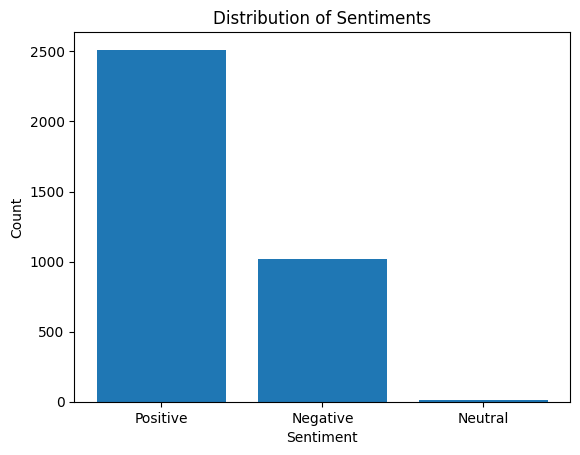

In [9]:
# Create a bar plot to visualize the sentiment distribution
plt.bar(sentiment_labels, sentiment_counts)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

In [10]:
# Calculate the average sentiment polarity
average_sentiment = df['Sentiment'].mean()

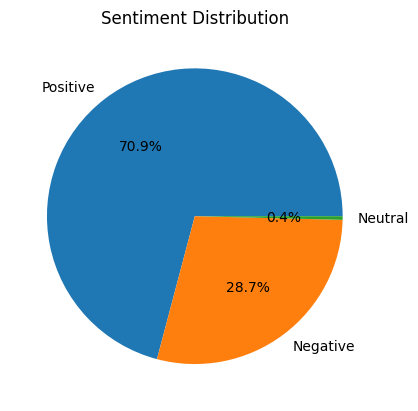

In [11]:
# Create a pie chart to visualize the sentiment distribution
plt.pie(sentiment_counts, labels=sentiment_labels, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

In [12]:
# Generate Word Cloud
all_reviews = ' '.join(df['Review'])

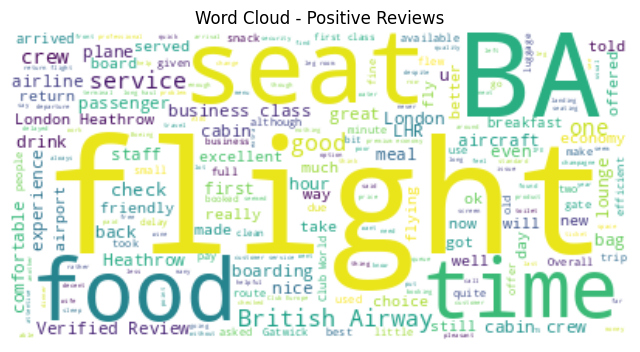

In [13]:
# Word Cloud for positive reviews
positive_reviews_text = ' '.join(positive_reviews['Review'])
plt.figure(figsize=(8, 6))
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_text)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Reviews')
plt.axis('off')
plt.show()

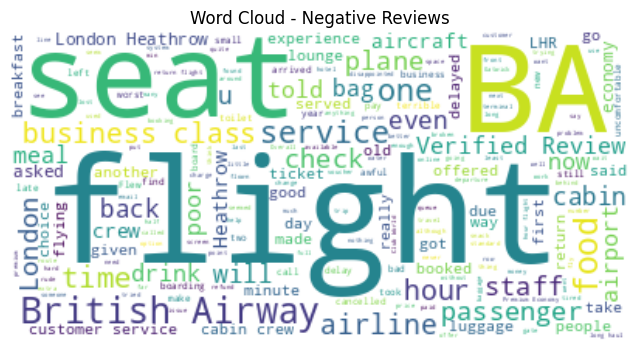

In [14]:
# Word Cloud for negative reviews
negative_reviews_text = ' '.join(negative_reviews['Review'])
plt.figure(figsize=(8, 6))
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_text)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Reviews')
plt.axis('off')
plt.show()

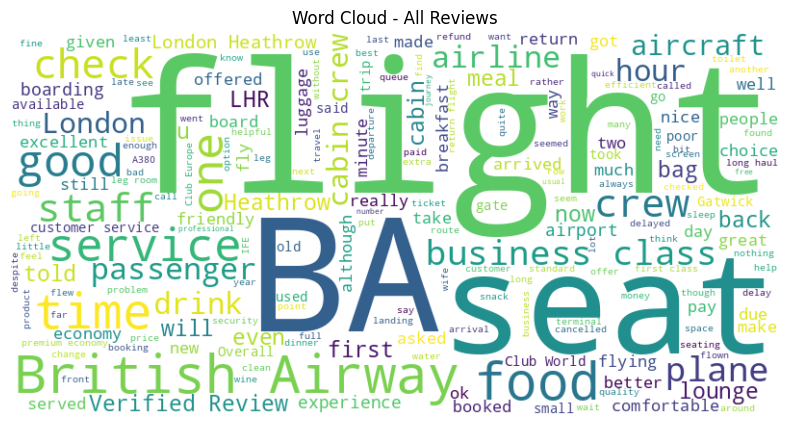

In [15]:
# Word Cloud for all reviews
plt.figure(figsize=(10, 5))
wordcloud_all = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('Word Cloud - All Reviews')
plt.axis('off')
plt.show()

In [16]:
# Print the average sentiment polarity
print(f"Average Sentiment Polarity: {average_sentiment}")

Average Sentiment Polarity: 0.09543571969753206
